# TRAIN WQI

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [24]:
df = pd.read_csv('final_water_dataX.csv',dtype={'STATION CODE': object, 'LOCATIONS': object, 'STATE': object, 'Temp': float, 'D.O.' : float, 'PH': float, 'Conductivity': float, 'B.O.D':float,'NI':float,'Fec_Coliform':float,'Tot_Coliform':float,'year':float})
print(df)

     STATION CODE                                          LOCATIONS  \
0            1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1            1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2            1475                                ZUARI AT PANCHAWADI   
3            3181                        RIVER ZUARI AT BORIM BRIDGE   
4            3182                       RIVER ZUARI AT MARCAIM JETTY   
...           ...                                                ...   
1780         1329  TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...   
1781         1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU   
1782         1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...   
1783         1403                 GUMTI AT U/S SOUTH TRIPURA,TRIPURA   
1784         1404                GUMTI AT D/S SOUTH TRIPURA, TRIPURA   

            STATE  Temp  D.O.    PH  Conductivity   B.O.D     NI  \
0     DAMAN & DIU  30.6   6.7  7.50         203.0  1.8965  0.100   

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION CODE  1785 non-null   object 
 1   LOCATIONS     1785 non-null   object 
 2   STATE         1785 non-null   object 
 3   Temp          1785 non-null   float64
 4   D.O.          1785 non-null   float64
 5   PH            1785 non-null   float64
 6   Conductivity  1785 non-null   float64
 7   B.O.D         1785 non-null   float64
 8   NI            1785 non-null   float64
 9   Fec_Coliform  1785 non-null   float64
 10  Tot_Coliform  1785 non-null   float64
 11  year          1785 non-null   float64
dtypes: float64(9), object(3)
memory usage: 167.5+ KB


In [27]:
df_num = pd.read_csv('num_final_water_dataX.csv',dtype={'Temp': float, 'D.O.' : float, 'PH': float, 'Conductivity': float, 'B.O.D':float,'NI':float,'Fec_Coliform':float,'Tot_Coliform':float,'year':float})
print(df_num)

      Temp  D.O.    PH  Conductivity   B.O.D     NI  Fec_Coliform  \
0     30.6   6.7  7.50         203.0  1.8965  0.100          11.0   
1     29.8   5.7  7.20         189.0  2.0000  0.200        4953.0   
2     29.5   6.3  6.90         179.0  1.7000  0.100        3243.0   
3     29.7   5.8  6.90          64.0  3.8000  0.500        5382.0   
4     29.5   5.8  7.30          83.0  1.9000  0.400        3428.0   
...    ...   ...   ...           ...     ...    ...           ...   
1893  27.0   7.4  7.00          88.5  0.9770  0.186          27.0   
1894  27.0   6.6  7.81         603.2  2.6750  0.263          40.0   
1895  28.0   6.6  7.49         571.5  2.0910  0.256         151.0   
1896  28.0   5.4  7.16          75.8  2.0920  0.520         404.0   
1897  30.0   5.4  7.37         104.8  1.8020  0.215         456.0   

      Tot_Coliform    year  
0             27.0  2014.0  
1           8391.0  2014.0  
2           5330.0  2014.0  
3           8443.0  2014.0  
4           5500.0  2014.0

In [28]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temp          1898 non-null   float64
 1   D.O.          1898 non-null   float64
 2   PH            1898 non-null   float64
 3   Conductivity  1898 non-null   float64
 4   B.O.D         1898 non-null   float64
 5   NI            1898 non-null   float64
 6   Fec_Coliform  1898 non-null   float64
 7   Tot_Coliform  1898 non-null   float64
 8   year          1898 non-null   float64
dtypes: float64(9)
memory usage: 133.6 KB


#Calculating Water Quality Index of each sample

In [29]:
# Calculating Water Quality Index of each sample
df_num = df.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num.drop(["year", "Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

c:\Users\Furka\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#Computing WQI for the whole dataset

In [30]:
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

#Converting oridnary array to numpy array

In [31]:
wqi_arr = calc_wqi_for_df(df_num)

wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df = df.reset_index()

#Combining dataframe of WQI and dataframe of attributes 

In [32]:
df_wqi = pd.concat([df, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1785, 13)

In [33]:
df_wqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION CODE  1785 non-null   object 
 1   LOCATIONS     1785 non-null   object 
 2   STATE         1785 non-null   object 
 3   Temp          1785 non-null   float64
 4   D.O.          1785 non-null   float64
 5   PH            1785 non-null   float64
 6   Conductivity  1785 non-null   float64
 7   B.O.D         1785 non-null   float64
 8   NI            1785 non-null   float64
 9   Fec_Coliform  1785 non-null   float64
 10  Tot_Coliform  1785 non-null   float64
 11  year          1785 non-null   float64
 12  WQI           1785 non-null   float64
dtypes: float64(10), object(3)
memory usage: 181.4+ KB


In [34]:
df_wqi[(df_wqi["WQI"] < 0)]

,STATION CODE,LOCATIONS,STATE,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform,year,WQI
196,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,20.5,6.7,2.7,1350.0,3.3000,1.10,7.0,16.0,2014.0,-6.855044
231,2,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,27.0,6.7,0.0,208.0,1.8965,0.52,233.0,465.0,2013.0,-61.372099
234,1865,RIVER DHADAR AT KOTHADA,GUJARAT,27.0,6.7,0.0,506.0,1.8965,6.00,26.0,227.0,2013.0,-65.334452
446,3375,LUKHA RIVER,MEGHALAYA,21.3,6.8,2.7,1074.0,3.2000,2.33,4.0,11.0,2013.0,-8.214971
719,3375,LUKHA RIVER AT MYNDIHATI (TRIBUTARY OF LUNAR),MEGHALAYA,25.0,6.9,2.6,1072.0,3.2000,1.17,3.0,21.0,2012.0,-10.579224


In [35]:
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [36]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (4 if (x <= 25)
                                        else(3 if (26<=x<=50)
                                        else(2 if (51<=x<=75)
                                        else(1 if (76<=x<=100)
                                        else 0)))))

In [37]:
df_wqi

,STATION CODE,LOCATIONS,STATE,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform,year,WQI,WQI clf
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.50,203.0,1.8965,0.100,11.0,27.0,2014.0,63.778321,2
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.20,189.0,2.0000,0.200,4953.0,8391.0,2014.0,175.363506,0
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.90,179.0,1.7000,0.100,3243.0,5330.0,2014.0,126.135831,0
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.90,64.0,3.8000,0.500,5382.0,8443.0,2014.0,195.105659,0
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.30,83.0,1.9000,0.400,3428.0,5500.0,2014.0,141.393246,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,1329,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",TAMILNADU,27.0,7.4,7.00,88.5,0.9770,0.186,27.0,105.0,2005.0,43.946271,3
1781,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,6.6,7.81,603.2,2.6750,0.263,40.0,191.0,2005.0,77.315135,1
1782,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,28.0,6.6,7.49,571.5,2.0910,0.256,151.0,273.0,2005.0,69.053768,2
1783,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,5.4,7.16,75.8,2.0920,0.520,404.0,513.0,2005.0,74.670773,2


In [40]:
print(len(df_wqi[df_wqi['WQI clf'] == 0]))
print(len(df_wqi[df_wqi['WQI clf'] == 1]))
print(len(df_wqi[df_wqi['WQI clf'] == 2]))
print(len(df_wqi[df_wqi['WQI clf'] == 3]))
print(len(df_wqi[df_wqi['WQI clf'] == 4]))

468
349
682
278
3


In [41]:
df_wqi.describe()

,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform,year,WQI,WQI clf
count,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1.780000e+03,1.780000e+03,1780.000000,1.780000e+03,1780.000000
mean,26.253644,6.398811,7.229067,1679.051028,6.503025,1.407751,1.876708e+05,2.683319e+05,2010.378652,4.308077e+03,1.437640
std,3.261829,1.303488,0.584353,5311.003639,27.887509,3.775112,5.534297e+06,8.062576e+06,2.704356,1.240982e+05,1.046442
min,10.000000,0.000000,2.900000,11.000000,0.100000,0.000000,0.000000e+00,0.000000e+00,2005.000000,1.679581e+01,0.000000
25%,25.000000,5.975000,6.900000,85.000000,1.100000,0.270000,4.600000e+01,1.097500e+02,2008.000000,5.488352e+01,0.000000
50%,27.000000,6.700000,7.229500,189.500000,1.800000,0.520000,2.330000e+02,4.650000e+02,2011.000000,7.035222e+01,2.000000
75%,28.259000,7.100500,7.600000,552.750000,3.500000,1.170000,6.497500e+02,1.605750e+03,2013.000000,9.690079e+01,2.000000
max,35.000000,11.400000,9.010000,65700.000000,534.500000,108.700000,1.800000e+08,3.000000e+08,2014.000000,4.045718e+06,4.000000


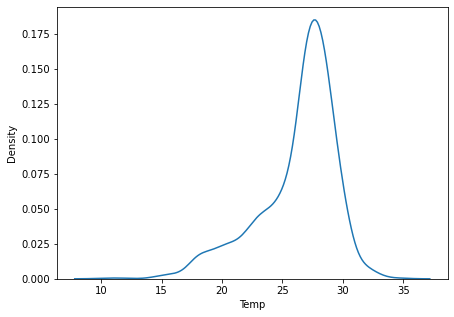

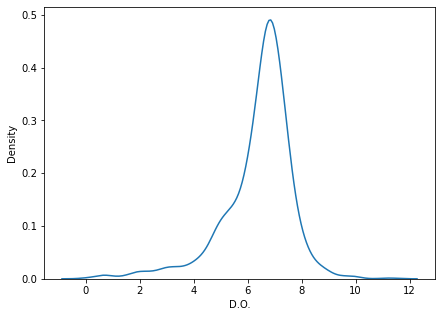

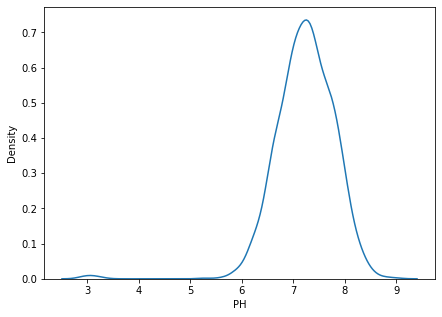

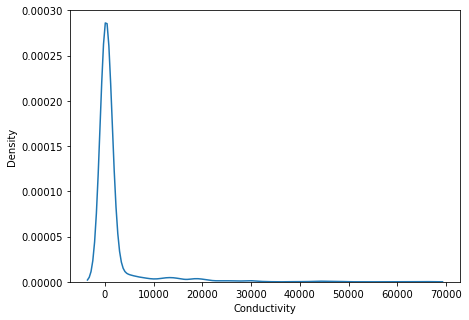

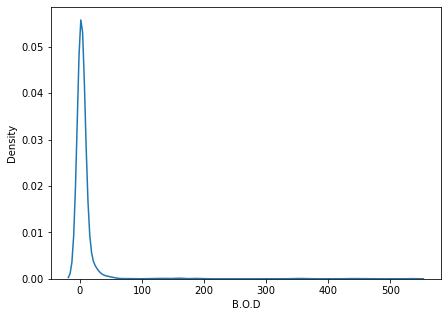

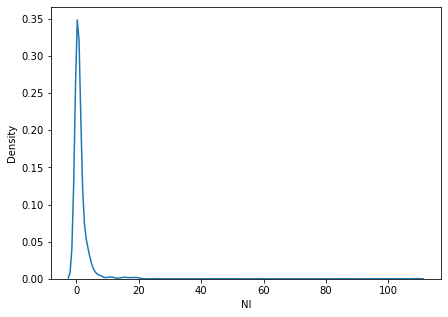

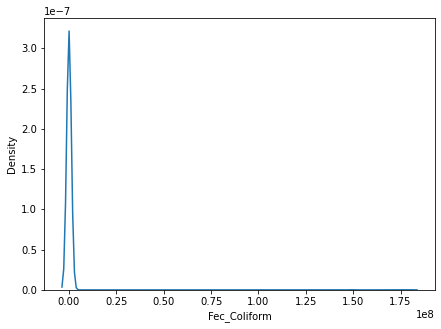

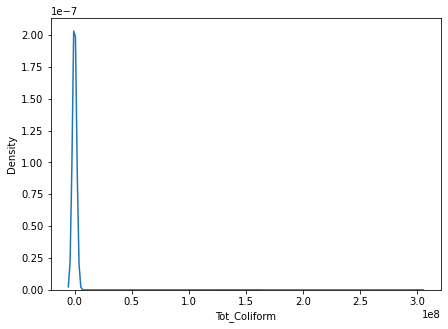

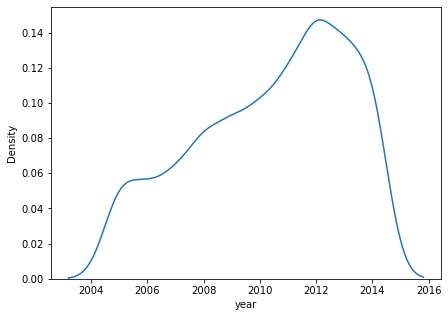

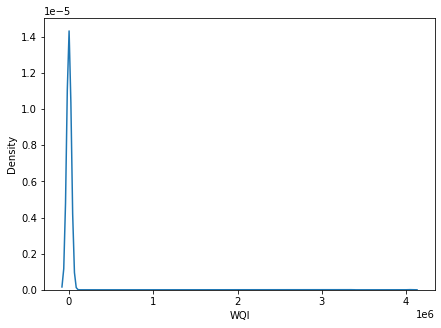

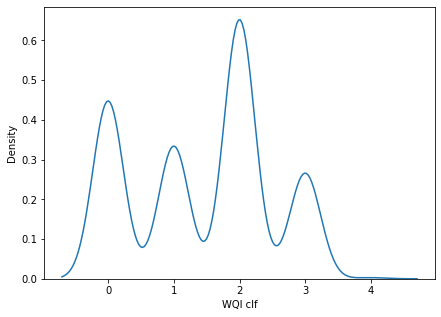

In [43]:
def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
plot_kde(df_wqi.select_dtypes(exclude="object"))

In [44]:
features = list(df_wqi.columns)[3:11]
X_train = df_wqi[features]
Y_train = df_wqi['WQI clf']

In [45]:
X_train

,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform
0,30.6,6.7,7.50,203.0,1.8965,0.100,11.0,27.0
1,29.8,5.7,7.20,189.0,2.0000,0.200,4953.0,8391.0
2,29.5,6.3,6.90,179.0,1.7000,0.100,3243.0,5330.0
3,29.7,5.8,6.90,64.0,3.8000,0.500,5382.0,8443.0
4,29.5,5.8,7.30,83.0,1.9000,0.400,3428.0,5500.0
...,...,...,...,...,...,...,...,...
1780,27.0,7.4,7.00,88.5,0.9770,0.186,27.0,105.0
1781,27.0,6.6,7.81,603.2,2.6750,0.263,40.0,191.0
1782,28.0,6.6,7.49,571.5,2.0910,0.256,151.0,273.0
1783,28.0,5.4,7.16,75.8,2.0920,0.520,404.0,513.0


In [46]:
Y_train

0       2
1       0
2       0
3       0
4       0
       ..
1780    3
1781    1
1782    2
1783    2
1784    1
Name: WQI clf, Length: 1780, dtype: int64

# Split data for train and test

In [47]:
from sklearn.model_selection import train_test_split
X_train_data,X_test_data,Y_train_data,Y_test_data = train_test_split(X_train,Y_train,test_size=0.20,random_state=42)

In [48]:
X_train_data

,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform
1283,21.0,4.50,7.20,885.0,10.50,3.30,1100.0,12000.0
750,24.0,6.30,7.50,287.0,0.90,0.14,5.0,204.0
425,20.3,7.10,7.50,293.0,1.30,0.00,9.0,19.0
1088,24.5,7.50,7.90,237.0,1.80,0.45,1225.0,2425.0
1663,22.0,6.27,7.89,3638.0,149.75,0.52,233.0,465.0
...,...,...,...,...,...,...,...,...
1135,24.0,5.48,7.42,180.0,2.08,0.52,233.0,136.0
1299,25.0,7.40,7.60,214.0,1.80,0.52,233.0,148.0
865,27.8,6.70,6.80,76.0,1.20,1.21,310.0,625.0
1464,28.0,6.10,7.70,120.0,1.36,0.52,264.0,350.0


In [49]:
X_test_data

,Temp,D.O.,PH,Conductivity,B.O.D,NI,Fec_Coliform,Tot_Coliform
1652,18.0,4.867,7.367,568.0,12.000,1.367,3500.0,27667.0
1306,26.0,7.900,7.500,350.0,1.800,0.520,41.0,90.0
949,20.0,4.800,7.000,167.1,2.800,0.520,233.0,465.0
1083,28.8,7.300,7.300,308.0,4.200,2.430,116.0,185.0
1717,27.0,6.800,7.060,63.3,0.567,0.404,1769.0,2825.0
...,...,...,...,...,...,...,...,...
1596,28.0,7.350,7.100,214.8,1.425,0.150,41.0,285.0
175,20.0,4.800,7.400,854.0,17.000,4.700,20500.0,38000.0
632,25.0,6.500,7.900,11170.0,3.000,0.300,233.0,465.0
542,23.0,7.000,7.700,409.0,2.400,0.930,4.0,112.0


In [50]:
Y_train_data

1283    0
750     2
425     2
1088    1
1663    0
       ..
1135    2
1299    2
865     2
1464    2
1131    2
Name: WQI clf, Length: 1424, dtype: int64

In [51]:
Y_test_data

1652    0
1306    2
949     1
1083    1
1717    1
       ..
1596    0
175     0
632     1
542     2
1559    2
Name: WQI clf, Length: 356, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_data = scaler.fit_transform(X_train_data)
X_test_data = scaler.transform(X_test_data)

In [59]:
np.save('X_train_data',X_train_data)

In [60]:
np.save('Y_train_data',Y_train_data)

In [61]:
np.save('X_test_data',X_test_data)

In [62]:
np.save('Y_test_data',Y_test_data)